In [22]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [23]:

####################################################################################################
####################################################################################################

file_xy  = "./pkl/test.pkl"
df_xy    = pd.read_pickle(file_xy)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_r_true   = df_xy[:]['x'].as_matrix()
arr_r_tpf    = df_xy[:]['intr_x'].as_matrix()
arr_r_nn     = df_xy[:]['intr_x_nn'].as_matrix()
arr_r_pred   = df_xy[:]['x_pred'].as_matrix()
arr_dr_true_pred = arr_r_true - arr_r_pred
arr_dr_true_nn   = arr_r_true - arr_r_nn



,event_number,x,y,intr_x,intr_y,intr_x_nn,intr_y_nn,x_pred,y_pred
0,1,2.626434,-17.960824,3.117168,-16.583333,3.270800,-16.607226,3.858828,-18.150707
1,3,10.907536,-6.312277,9.850251,-5.610902,9.921544,-5.569570,10.961799,-6.187883
2,5,24.631697,-12.763601,24.563283,-12.343985,24.643193,-12.371619,25.968349,-13.918870
3,6,2.726006,37.749081,2.119674,34.039474,2.042468,33.434272,1.612665,36.465977
4,8,-18.078293,-23.212466,-16.583333,-20.822682,-16.423884,-21.070236,-17.852966,-21.908081


In [24]:

####################################################################################################
####################################################################################################

r_min     = -45
r_max     =  45
r_nbins   = 90

dr_min   = -6
dr_max   =  6
dr_nbins = 12*10

eps   = .001

r_mean_true  = np.mean(arr_r_true)
r_mean_tpf   = np.mean(arr_r_tpf )
r_mean_nn    = np.mean(arr_r_nn  )
r_mean_pred  = np.mean(arr_r_pred)

r_std_true   = np.std(arr_r_true)
r_std_tpf    = np.std(arr_r_tpf )
r_std_nn     = np.std(arr_r_nn  )
r_std_pred   = np.std(arr_r_pred)

dr_mean_true_nn   = np.mean(arr_dr_true_nn)
dr_mean_true_pred = np.mean(arr_dr_true_pred)

dr_std_true_nn    = np.std (arr_dr_true_nn)
dr_std_true_pred  = np.std (arr_dr_true_pred)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', r_std_true, r_mean_true )
label_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'TPF ', r_std_tpf , r_mean_tpf  )
label_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'XeNN', r_std_nn  , r_mean_nn   )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', r_std_pred, r_mean_pred )

dr_label_true_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'dR(true, NN (Xe1T))', dr_std_true_nn  , dr_mean_true_nn   )
dr_label_true_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'dR(true, pred)'     , dr_std_true_pred, dr_mean_true_pred )



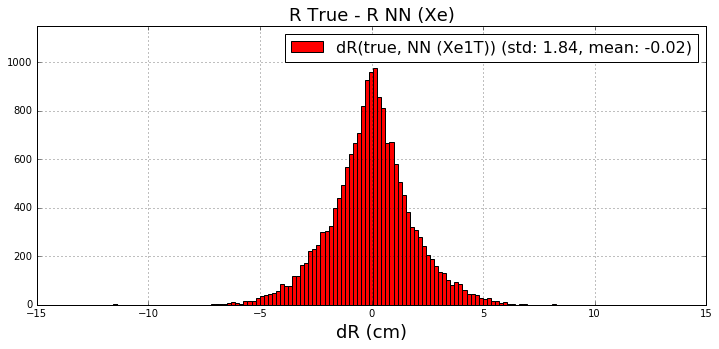

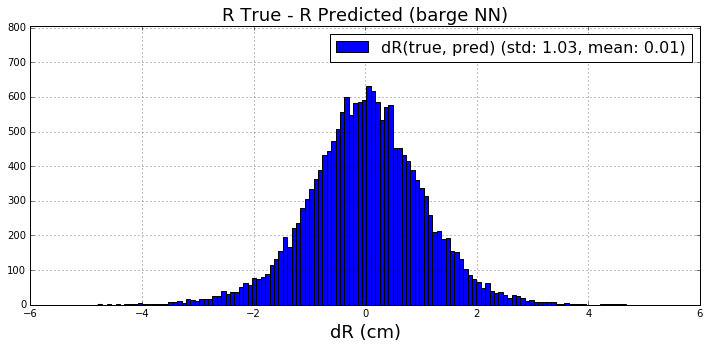

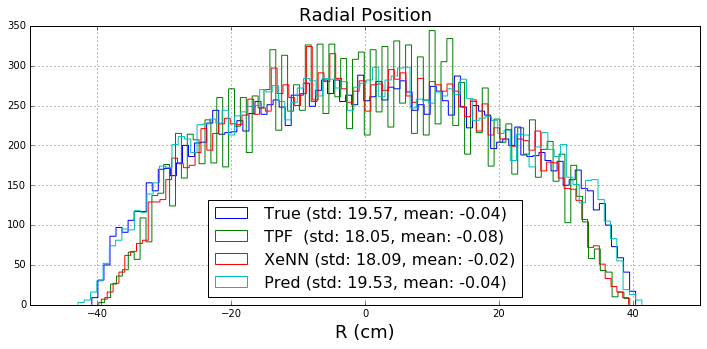

In [27]:

####################################################################################################
####################################################################################################

w, h = 12, 5

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_nn, bins=dr_nbins, fill=True, histtype='bar', color='r', label=dr_label_true_nn)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.xlabel('dR (cm)', fontsize=18)
plt.title('R True - R NN (Xe)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_pred, bins=dr_nbins, fill=True, histtype='bar', color='b', label=dr_label_true_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.xlabel('dR (cm)', fontsize=18)
plt.title('R True - R Predicted (barge NN)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_r_true, bins=r_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_r_tpf , bins=r_nbins, fill=False, histtype='step', label=label_tpf )
plt.hist(arr_r_nn  , bins=r_nbins, fill=False, histtype='step', label=label_nn  )
plt.hist(arr_r_pred, bins=r_nbins, fill=False, histtype='step', label=label_pred)

#plt.xlim([xy_min, xy_max])
plt.xlabel('R (cm)', fontsize=18)
plt.title('Radial Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)


In [28]:

#fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
#plt.subplot(rows, cols, 1)
